In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test_df = pd.read_csv('./adult.data_converted.csv')
test_df.drop(32561, axis=0, inplace=True)

In [3]:
test_df.tail(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
32551,32.0,Private,34066.0,10th,6.0,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0.0,0.0,40.0,United-States,0.0
32552,43.0,Private,84661.0,Assoc-voc,11.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,45.0,United-States,0.0
32553,32.0,Private,116138.0,Masters,14.0,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,11.0,Taiwan,0.0
32554,53.0,Private,321865.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
32555,22.0,Private,310152.0,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0.0
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0.0
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0.0
32560,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,1.0


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               32561 non-null  float64
 1   work-class        30725 non-null  object 
 2   fnlwgt            32561 non-null  float64
 3   education         32561 non-null  object 
 4   education-num     32561 non-null  float64
 5   marital-status    32561 non-null  object 
 6   occupation        30718 non-null  object 
 7   relationship      32561 non-null  object 
 8   race              32561 non-null  object 
 9   sex               32561 non-null  object 
 10  capital-gain      32561 non-null  float64
 11  capital-loss      32561 non-null  float64
 12  hours-per-week    32561 non-null  float64
 13  native-country    31978 non-null  object 
 14  is_more_than_50K  32561 non-null  float64
dtypes: float64(7), object(8)
memory usage: 4.0+ MB


In [5]:
print('데이터 세트 Null 값 갯수 \n',test_df.isnull().sum())

데이터 세트 Null 값 갯수 
 age                    0
work-class          1836
fnlwgt                 0
education              0
education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country       583
is_more_than_50K       0
dtype: int64


In [6]:
test_df.drop(['education','capital-gain','capital-loss','native-country','fnlwgt'], axis=1, inplace=True)

In [7]:
test_df_dropna = test_df#.dropna(axis = 0)

In [8]:
print('데이터 세트 Null 값 갯수 \n',test_df_dropna.isnull().sum())

데이터 세트 Null 값 갯수 
 age                    0
work-class          1836
education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
sex                    0
hours-per-week         0
is_more_than_50K       0
dtype: int64


## 각 칼럼별 50K이상인 사람 히스토그램

<AxesSubplot:xlabel='work-class', ylabel='is_more_than_50K'>

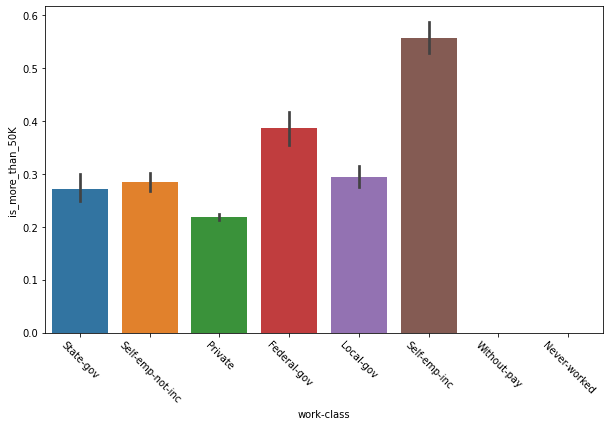

In [9]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='work-class', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='education-num', ylabel='is_more_than_50K'>

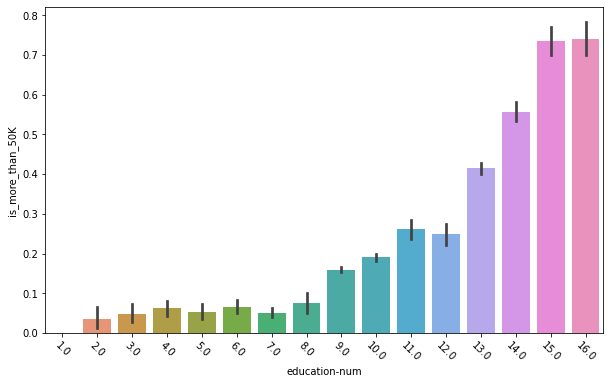

In [10]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='education-num', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='marital-status', ylabel='is_more_than_50K'>

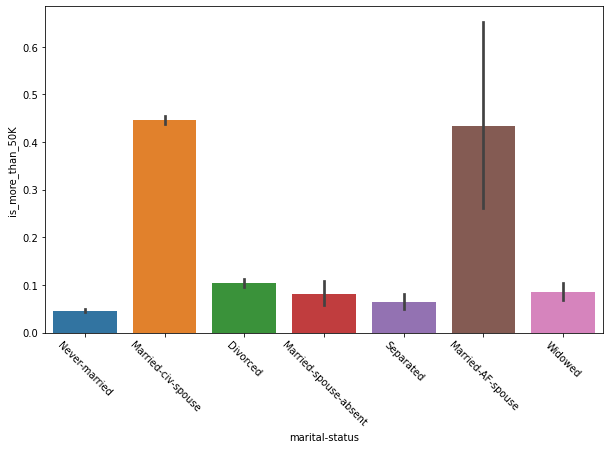

In [11]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='marital-status', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='occupation', ylabel='is_more_than_50K'>

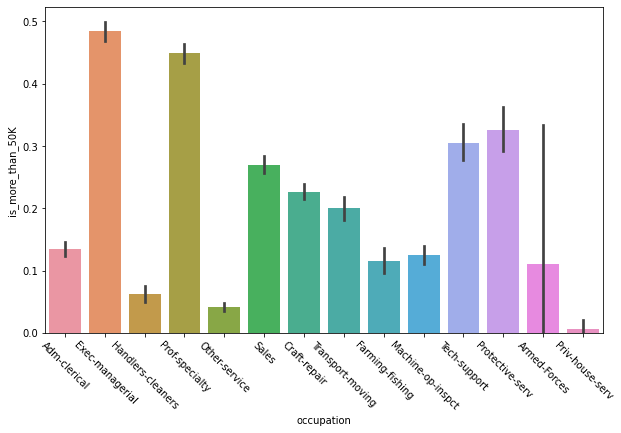

In [12]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45)
sns.barplot(x='occupation', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='relationship', ylabel='is_more_than_50K'>

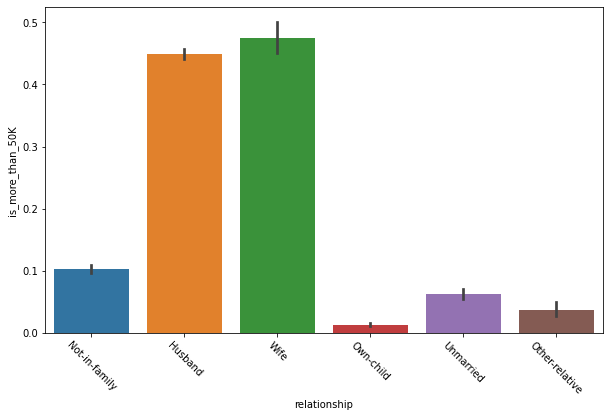

In [13]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='relationship', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='race', ylabel='is_more_than_50K'>

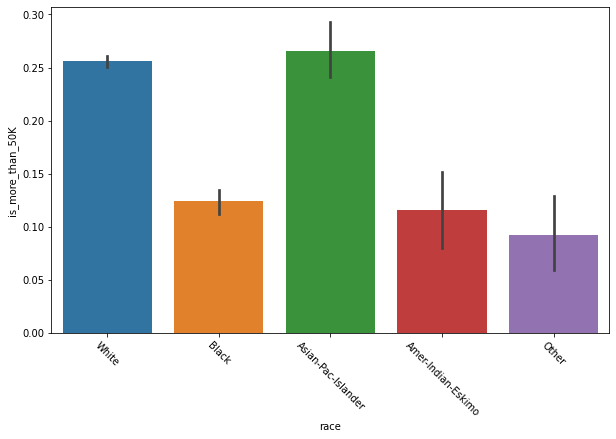

In [14]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = - 45 )
sns.barplot(x='race', y = 'is_more_than_50K', data=test_df_dropna)

<AxesSubplot:xlabel='sex', ylabel='is_more_than_50K'>

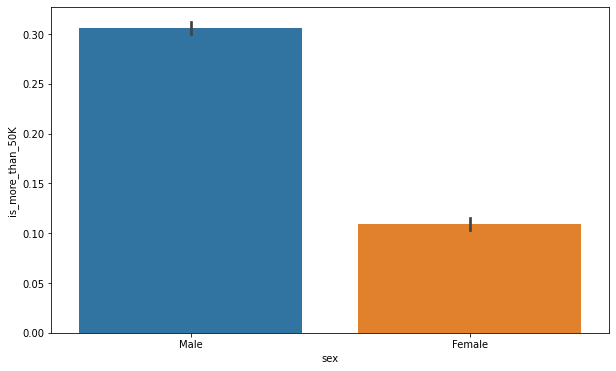

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y = 'is_more_than_50K', data=test_df_dropna)

In [16]:
def encode_features(dataDF):
    features = ['work-class', 'sex', 'marital-status','occupation',\
                'race','relationship']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

test_df_dropna = encode_features(test_df_dropna)
test_df_dropna.head(10)

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,is_more_than_50K
0,39.0,6,13.0,4,0,1,4,1,40.0,0.0
1,50.0,5,13.0,2,3,0,4,1,13.0,0.0
2,38.0,3,9.0,0,5,1,4,1,40.0,0.0
3,53.0,3,7.0,2,5,0,2,1,40.0,0.0
4,28.0,3,13.0,2,9,5,2,0,40.0,0.0
5,37.0,3,14.0,2,3,5,4,0,40.0,0.0
6,49.0,3,5.0,3,7,1,2,0,16.0,0.0
7,52.0,5,9.0,2,3,0,4,1,45.0,1.0
8,31.0,3,14.0,4,9,1,4,0,50.0,1.0
9,42.0,3,13.0,2,3,0,4,1,40.0,1.0


In [17]:
test_df_dropna.head(10)

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,is_more_than_50K
0,39.0,6,13.0,4,0,1,4,1,40.0,0.0
1,50.0,5,13.0,2,3,0,4,1,13.0,0.0
2,38.0,3,9.0,0,5,1,4,1,40.0,0.0
3,53.0,3,7.0,2,5,0,2,1,40.0,0.0
4,28.0,3,13.0,2,9,5,2,0,40.0,0.0
5,37.0,3,14.0,2,3,5,4,0,40.0,0.0
6,49.0,3,5.0,3,7,1,2,0,16.0,0.0
7,52.0,5,9.0,2,3,0,4,1,45.0,1.0
8,31.0,3,14.0,4,9,1,4,0,50.0,1.0
9,42.0,3,13.0,2,3,0,4,1,40.0,1.0


In [18]:
y_test_df = test_df_dropna['is_more_than_50K']
X_test_df= test_df_dropna.drop('is_more_than_50K',axis=1)

In [19]:
y_test_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_more_than_50K, dtype: float64

In [20]:
X_test_df.head()

,age,work-class,education-num,marital-status,occupation,relationship,race,sex,hours-per-week
0,39.0,6,13.0,4,0,1,4,1,40.0
1,50.0,5,13.0,2,3,0,4,1,13.0
2,38.0,3,9.0,0,5,1,4,1,40.0
3,53.0,3,7.0,2,5,0,2,1,40.0
4,28.0,3,13.0,2,9,5,2,0,40.0


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X_test_df, y_test_df, \
                                                  test_size=0.3, random_state=12)

## 각 모듈당 한 번씩만 돌려본 것

In [22]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, dt_pred)))
print('DecisionTreeClassifier 재현도: {0:.4f}'.format(recall_score(y_test, dt_pred)))
print('DecisionTreeClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, dt_pred)))
print()

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0:.4f}'.format(precision_score(y_test, rf_pred)))
print('RandomForestClassifier 재현도: {0:.4f}'.format(recall_score(y_test, rf_pred)))
print('RandomForestClassifier f1스코어: {0:.4f}'.format(f1_score(y_test, rf_pred)))
print()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0:.4f}'.format(precision_score(y_test, lr_pred)))
print('LogisticRegression 재현도: {0:.4f}'.format(recall_score(y_test, lr_pred)))
print('LogisticRegression f1스코어: {0:.4f}'.format(f1_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7792
DecisionTreeClassifier 정밀도: 0.5471
DecisionTreeClassifier 재현도: 0.5307
DecisionTreeClassifier f1스코어: 0.5388

RandomForestClassifier 정확도:0.8167
RandomForestClassifier 정밀도: 0.6416
RandomForestClassifier 재현도: 0.5564
RandomForestClassifier f1스코어: 0.5960

LogisticRegression 정확도: 0.8073
LogisticRegression 정밀도: 0.6701
LogisticRegression 재현도: 0.4082
LogisticRegression f1스코어: 0.5073


## Decision Tree

In [23]:
scores = cross_val_score(dt_clf, X_test_df , y_test_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7809
교차 검증 1 정확도: 0.7723
교차 검증 2 정확도: 0.7846
교차 검증 3 정확도: 0.7787
교차 검증 4 정확도: 0.7839
평균 정확도: 0.7801


In [29]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf,out_file="tree.dot", max_depth=4, impurity=True, filled=True, feature_names = X_test_df.columns)

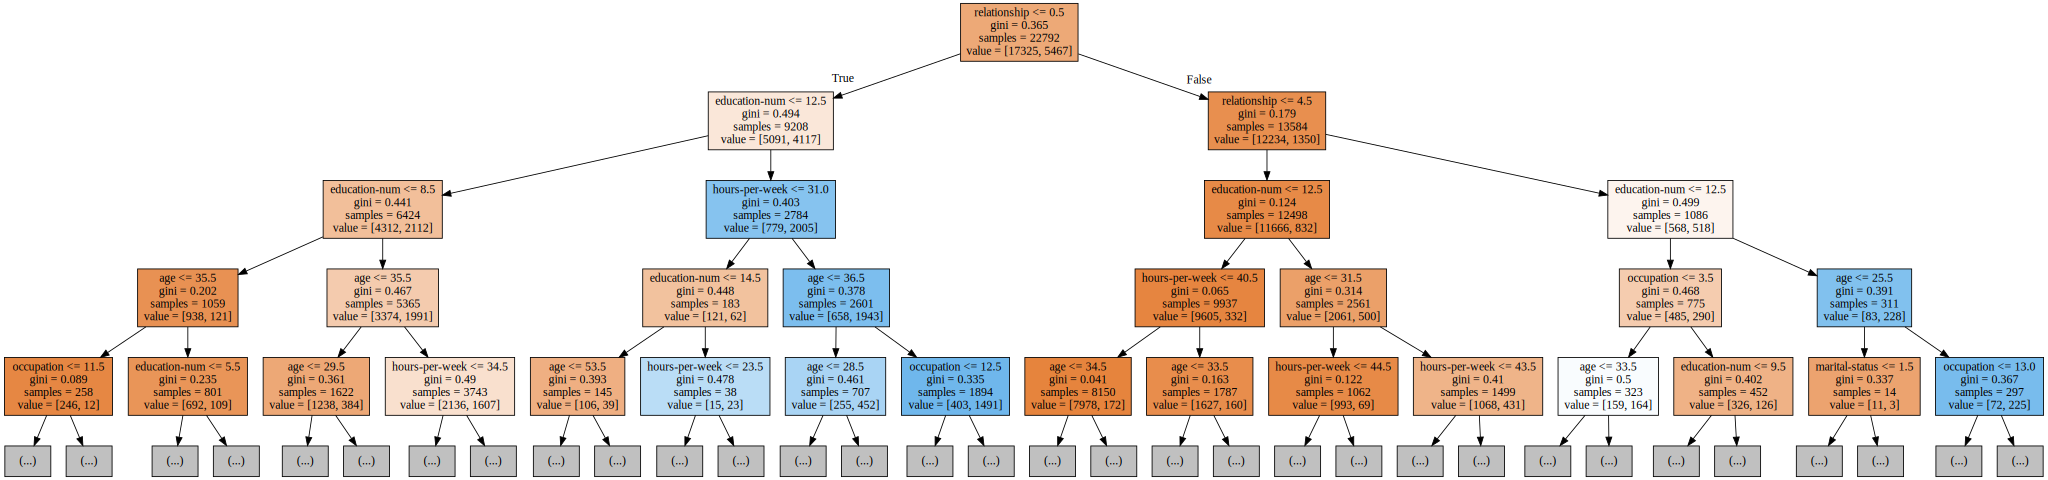

In [30]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [26]:
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,2,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8282
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8284


In [27]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dclf.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.5f}'.format(accuracy_score(y_test,pred)))
print('테스트 데이터 세트 정밀도: {0:.5f}'.format(precision_score(y_test,pred)))
print('테스트 데이터 세트 재현율: {0:.5f}'.format(recall_score(y_test,pred)))
print('테스트 데이터 세트 f1스코어: {0:.5f}'.format(f1_score(y_test,pred)))
print('테스트 데이터 세트 roc_auc_스코어: {0:.5f}'.format(roc_auc_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.82844
테스트 데이터 세트 정밀도: 0.67573
테스트 데이터 세트 재현율: 0.56529
테스트 데이터 세트 f1스코어: 0.61560
테스트 데이터 세트 roc_auc_스코어: 0.73910


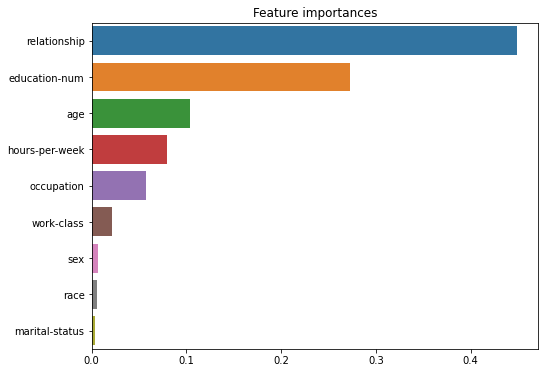

In [28]:
ftr_importances_values = estimator.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## 랜덤포레스트

In [ ]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))